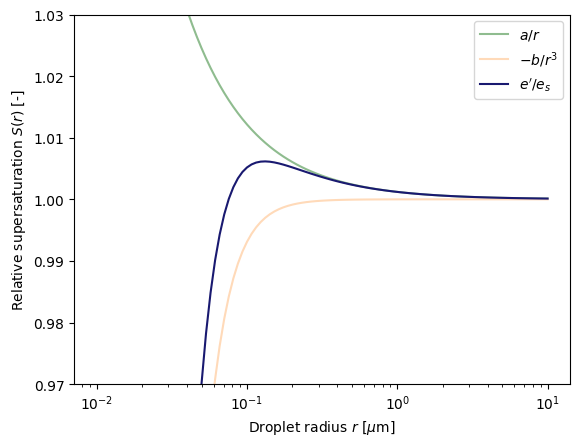

In [5]:
import numpy as np
import matplotlib.pyplot as plt

aT   = 3.3e-7   # Km          - Kelvin factor
b    = 43e-6    # m^3 mol^-1  - Raoult factor
rs   = 0.008e-6 # m           - Dry radius
Ms   = 58.44e-3 # kg mol^-1   - Molar mass of NaCl
rhos = 2200     # kg m^-3     - Dry density of NaCl
T    = 273.15   # K           - Temperature
iH   = 2        # -           - Van 't Hoff factor

ms = 4/3*np.pi*rhos*rs**3

r   = np.logspace(-8,-5,100)
SRa = 1/(1+b*iH*ms/Ms/r**3)
SKe = np.exp(aT/T/r)
SKo = SRa*SKe
rmum = r*1e6

fig = plt.figure(); ax = plt.gca()
ax.plot(rmum,SKe,label=r'$a/r$',c='darkseagreen')
ax.plot(rmum,SRa,label=r'$-b/r^3$',c='peachpuff')
ax.plot(rmum,SKo,label=r"$e'/e_s$",c='midnightblue')
ax.set_xlabel(r'Droplet radius $r$ [$\mu$m]')
ax.set_ylabel(r'Relative supersaturation $S(r)$ [-]')
ax.set_xscale('log')
ax.set_ylim((0.97,1.03))
ax.legend()
plt.savefig('Figures/kohler.pdf',bbox_inches='tight')
plt.show()

In [9]:
bans = b*iH*ms/Ms
aans = aT/T

ract = np.sqrt(3*bans/aans)
ract

np.float64(1.313073411559048e-07)